https://drive.google.com/drive/folders/1pGowtHWJD-c4p5URZu6HclhNgVmDrRwg

In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn import metrics
import matplotlib.pyplot as plt
import random


In [18]:
file_id = '117LO2wPC6D-Dr2LfkIVZfZDWrVMoEIGR'
url = f'https://drive.google.com/uc?id={file_id}'

In [19]:
data = pd.read_csv(url)
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [20]:
print(data['age'].isna().sum(), data['age'].unique())
print(data['sex'].isna().sum(), data['sex'].unique())
print(data['bmi'].isna().sum(), data['bmi'].unique())
print(data['children'].isna().sum(), data['children'].unique())
print(data['smoker'].isna().sum(), data['smoker'].unique())
print(data['region'].isna().sum(),data['region'].unique())
print(data['charges'].isna().sum(), data['charges'].unique())

0 [19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
0 ['female' 'male']
0 [27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28.595 49.06  27.17  23.37  37.1
 23.75  28.975 31.35  33.915 28.785 28.3   37.4   17.765 34.7   2

In [21]:
for index, row in data.iterrows():
    if row['age'] < 20:
        data.at[index, 'age'] = 'teen'
    if row['age'] >= 20 and row['age'] < 40:
        data.at[index , 'age'] = 'young adults'
    if row['age'] >= 40 and row['age'] <60:
        data.at[index, 'age'] = 'adults'
    if row['age'] >= 60 :
        data.at[index, 'age'] = 'middle age adults'
data['age'].value_counts()

<ipython-input-21-04e61f46a6a8>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'teen' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.at[index, 'age'] = 'teen'


,count
age,
adults,550
young adults,537
teen,137
middle age adults,114


In [22]:
lblenc=LabelEncoder()
zero_one_valued = ['sex','smoker']
for col in zero_one_valued:
  data[col] = lblenc.fit_transform(data[col])
data.head()

,age,sex,bmi,children,smoker,region,charges
0,teen,0,27.900,0,1,southwest,16884.92400
1,teen,1,33.770,1,0,southeast,1725.55230
2,young adults,1,33.000,3,0,southeast,4449.46200
3,young adults,1,22.705,0,0,northwest,21984.47061
4,young adults,1,28.880,0,0,northwest,3866.85520


In [23]:
tmp = data
enc = OneHotEncoder(sparse_output=False)
age = enc.fit_transform(data[['age']])
enc_data1 = pd.DataFrame(age, columns=enc.get_feature_names_out(['age']))
tmp.drop(columns='age', inplace=True )

In [24]:
region = enc.fit_transform(data[['region']])
enc_data2 = pd.DataFrame(region, columns=enc.get_feature_names_out(['region']))
tmp.drop(columns='region', inplace=True )

In [25]:
OneHotData = tmp.join(enc_data1)
OneHotData = OneHotData.join(enc_data2)
OneHotData

,sex,bmi,children,smoker,charges,age_adults,age_middle age adults,age_teen,age_young adults,region_northeast,region_northwest,region_southeast,region_southwest
0,0,27.900,0,1,16884.92400,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,33.000,3,0,4449.46200,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1,22.705,0,0,21984.47061,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1,28.880,0,0,3866.85520,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,1,30.970,3,0,10600.54830,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1334,0,31.920,0,0,2205.98080,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,0,36.850,0,0,1629.83350,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,0,25.800,0,0,2007.94500,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [26]:
first_column = OneHotData.pop('charges')
OneHotData.insert(12, 'charges', first_column)
OneHotData

,sex,bmi,children,smoker,age_adults,age_middle age adults,age_teen,age_young adults,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,0,27.900,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,16884.92400
1,1,33.770,1,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1725.55230
2,1,33.000,3,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,4449.46200
3,1,22.705,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,21984.47061
4,1,28.880,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3866.85520
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,1,30.970,3,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10600.54830
1334,0,31.920,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2205.98080
1335,0,36.850,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1629.83350
1336,0,25.800,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2007.94500


In [27]:
d = preprocessing.normalize(OneHotData.iloc[:,0:12])
scaled_df = pd.DataFrame(d, columns=OneHotData.iloc[:,0:12].columns)
scaled_df.insert(12, 'charges', first_column)
scaled_df

,sex,bmi,children,smoker,age_adults,age_middle age adults,age_teen,age_young adults,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,0.000000,0.998079,0.000000,0.035773,0.000000,0.000000,0.035773,0.000000,0.000000,0.000000,0.000000,0.035773,16884.92400
1,0.029560,0.998251,0.029560,0.000000,0.000000,0.000000,0.029560,0.000000,0.000000,0.000000,0.029560,0.000000,1725.55230
2,0.030137,0.994535,0.090412,0.000000,0.000000,0.000000,0.000000,0.030137,0.000000,0.000000,0.030137,0.000000,4449.46200
3,0.043916,0.997103,0.000000,0.000000,0.000000,0.000000,0.000000,0.043916,0.000000,0.043916,0.000000,0.000000,21984.47061
4,0.034564,0.998206,0.000000,0.000000,0.000000,0.000000,0.000000,0.034564,0.000000,0.034564,0.000000,0.000000,3866.85520
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.032089,0.993802,0.096268,0.000000,0.032089,0.000000,0.000000,0.000000,0.000000,0.032089,0.000000,0.000000,10600.54830
1334,0.000000,0.999020,0.000000,0.000000,0.000000,0.000000,0.031298,0.000000,0.031298,0.000000,0.000000,0.000000,2205.98080
1335,0.000000,0.999264,0.000000,0.000000,0.000000,0.000000,0.027117,0.000000,0.000000,0.000000,0.027117,0.000000,1629.83350
1336,0.000000,0.998501,0.000000,0.000000,0.000000,0.000000,0.000000,0.038702,0.000000,0.000000,0.000000,0.038702,2007.94500


In [28]:
X = scaled_df.iloc[:, :-1]
y = scaled_df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


In [29]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

MAE: 5934.9224
MSE: 62769200.6498
RMSE: 7922.7016


In [30]:
def Cost(x , y , w , b):
  predict = np.dot(x,w)+b
  m = X_train.shape[0]
  cost = np.sum((predict - y)**2)/(2*m)
  return cost


def gradient_descent (x , y , w_in , b_in) :
    predict = np.dot(x,w_in)+b_in
    m = X_train.shape[0]
    dj_dw = np.dot((predict-y),x)/m
    dj_db = np.sum(predict-y)/m
    return dj_dw,dj_db

In [34]:
loss = []
w = np.random.randn(X_train.shape[1])
b = np.random.randn()
loss.append(Cost(X_train , y_train , w ,b))

alpha = 0.01
print(w.shape)

tmp = []
for _ in range(10000):
    tmp.append(Cost(X_train, y_train, w, b))
    dw, db = gradient_descent(X_train, y_train, w, b)
    w -= alpha * dw
    b -= alpha * db
loss.append(tmp)


(12,)


In [35]:

x_train1, x_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.35)
x_train2, x_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.5)
x_train3, x_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.6)
x_train4, x_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.75)
x_train5, x_test5, y_train5, y_test5 = train_test_split(X, y, test_size=0.85)

w1 = np.random.randn(x_train1.shape[1])
w2 = np.random.randn(x_train2.shape[1])
w3 = np.random.randn(x_train3.shape[1])
w4 = np.random.randn(x_train4.shape[1])
w5 = np.random.randn(x_train5.shape[1])
cost1=[]
cost2=[]
cost3=[]
cost4=[]
cost5=[]
for _ in range(1000):
  cost1.append(Cost(x_train1 , y_train1 , w1 ,b))
  dw,db = gradient_descent(x_train1 , y_train1 , w1 ,b)
  w1 -= alpha * dw
  b -= alpha * db
  cost2.append(Cost(x_train2 , y_train2 , w2 ,b))
  dw,db = gradient_descent(x_train2 , y_train2 , w2 ,b)
  w2 -= alpha * dw
  b -= alpha * db
  cost3.append(Cost(x_train3 , y_train3 , w3 ,b))
  dw,db = gradient_descent(x_train3 , y_train3 , w3 ,b)
  w3 -= alpha * dw
  b -= alpha * db
  cost4.append(Cost(x_train4 , y_train4 , w4 ,b))
  dw,db = gradient_descent(x_train4 , y_train4 , w4 ,b)
  w4 -= alpha * dw
  b -= alpha * db
  cost5.append(Cost(x_train5 , y_train5 , w5 ,b))
  dw,db = gradient_descent(x_train5 , y_train5 , w5 ,b)
  w5 -= alpha * dw
  b -= alpha * db

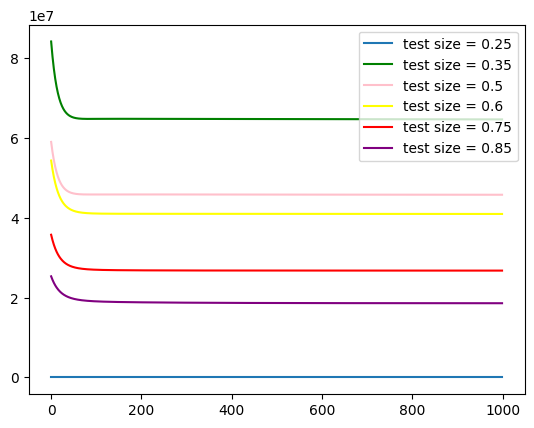

In [36]:
plt.plot(range(1000),label = "test size = 0.25")

plt.plot(range(1000), cost1, color = 'g' , label ="test size = 0.35")

plt.plot(range(1000), cost2, color = 'pink' , label = "test size = 0.5")

plt.plot(range(1000), cost3, color = 'yellow' , label ="test size = 0.6")

plt.plot(range(1000), cost4, color = 'r' , label = "test size = 0.75")

plt.plot(range(1000), cost5 , color = 'purple' , label ="test size = 0.85" )

plt.legend()
plt.show()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

In [38]:
y_pred = model.predict(X_test)

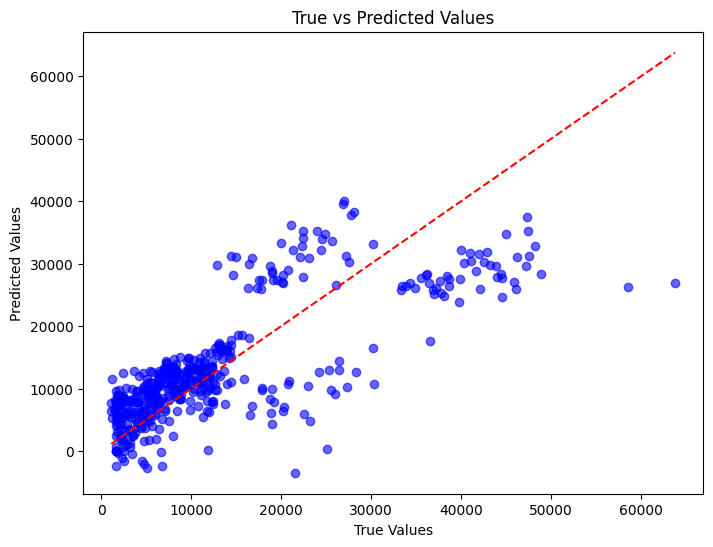

In [39]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

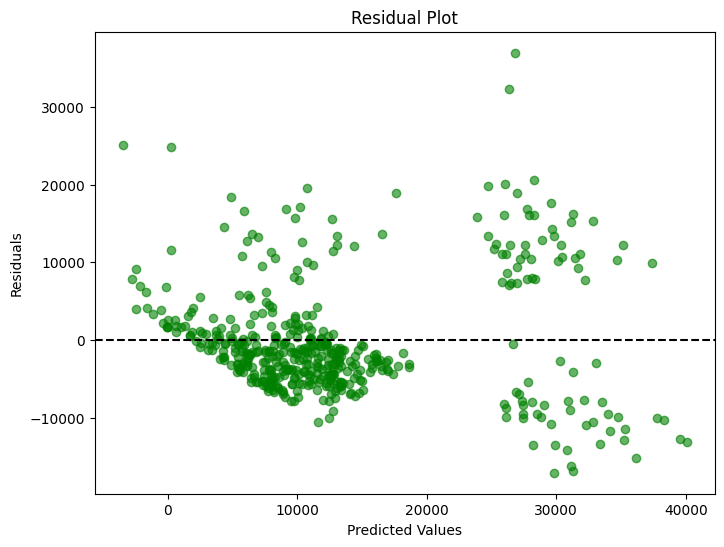

In [40]:
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, color='green', alpha=0.6)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

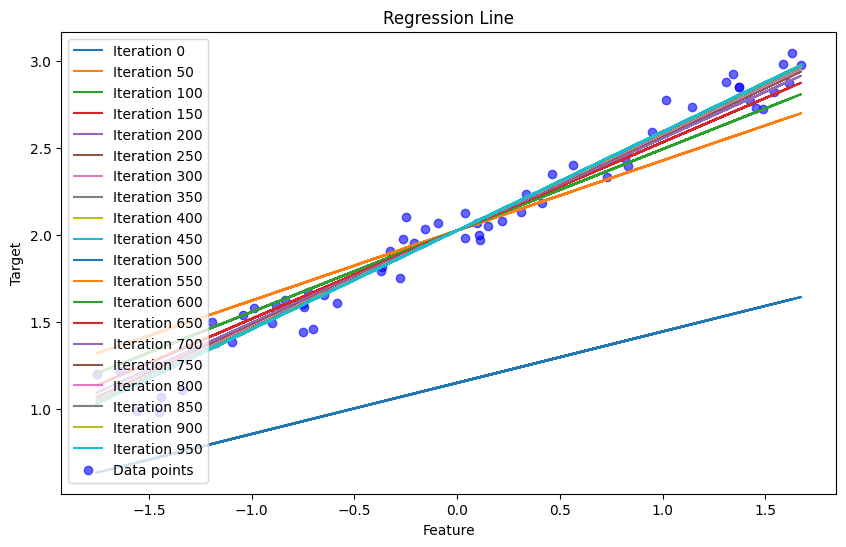

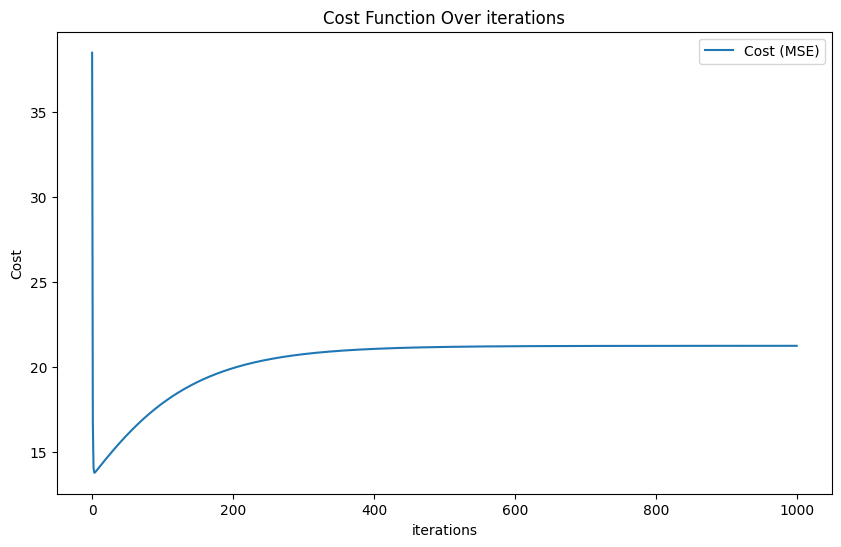

MSE: 0.01219640718720106


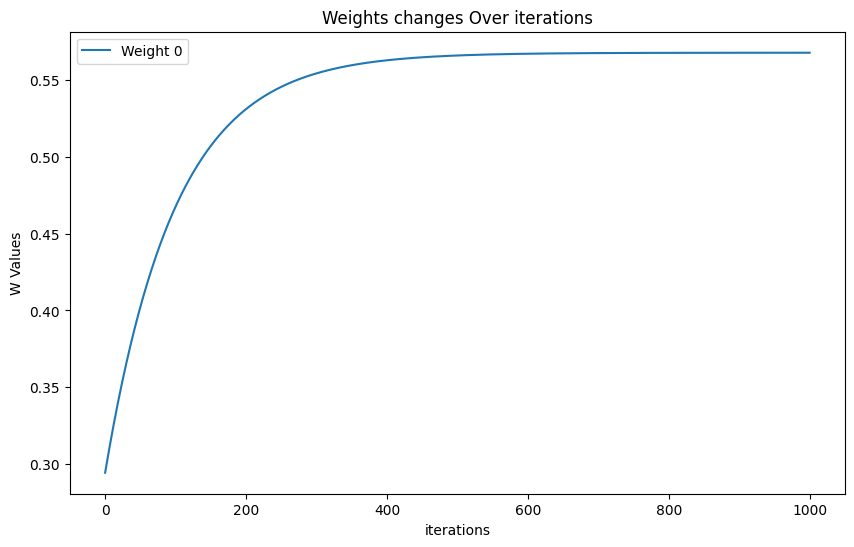


Changes in Weights:
Weight 0: [0.29442521 0.29715866 0.29986479 0.30254385 0.30519612 0.30782186
 0.31042135 0.31299485 0.31554261 0.31806489] ... [0.5677578  0.56775793 0.56775806 0.56775819 0.56775831 0.56775844
 0.56775856 0.56775869 0.56775881 0.56775893]


In [48]:



w = np.random.randn(X_train_scaled.shape[1])
b = np.random.randn()

alpha = 0.01
iterations = 1000
m = len(y_train)
cost_history = []
weights_history = []

plt.figure(figsize=(10, 6))
for i in range(iterations):
    predict = np.dot(X_train_scaled, w) + b

    dj_dw = np.dot(X_train_scaled.T, (predict - y_train.ravel())) / m
    dj_dw = dj_dw.reshape(w.shape)

    dj_db = np.sum(predict - y_train) / m
    w -= alpha * dj_dw
    b -= alpha * dj_db
    cost = Cost(X_train_scaled, y_train, w, b)
    cost_history.append(cost)
    if i % 50 == 0:
        plt.plot(X_train_scaled, np.dot(X_train_scaled, w) + b, label=f"Iteration {i}")

    weights_history.append(w.copy())

plt.scatter(X_train_scaled, y_train, color='blue', alpha=0.6, label="Data points")
plt.title("Regression Line")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(len(cost_history)), cost_history, label="Cost (MSE)")
plt.title("Cost Function Over iterations")
plt.xlabel("iterations")
plt.ylabel("Cost")
plt.legend()
plt.show()

y_pred = np.dot(X_test_scaled, w) + b
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

weights_history = np.array(weights_history)
plt.figure(figsize=(10, 6))
for i in range(weights_history.shape[1]):
    plt.plot(range(iterations), weights_history[:, i], label=f"Weight {i}")
plt.title("Weights changes Over iterations")
plt.xlabel("iterations")
plt.ylabel("W Values")
plt.legend()
plt.show()

print("\nChanges in Weights:")
for i, weight in enumerate(weights_history.T):
    print(f"Weight {i}: {weight[:10]} ... {weight[-10:]}")

Iteration 0: Weights = [0.16395901], Bias = [0.52862782], Cost = 1.2027
Iteration 200: Weights = [0.56246884], Bias = [2.02036774], Cost = 0.0047
Iteration 400: Weights = [0.56246884], Bias = [2.02036774], Cost = 0.0047
Iteration 600: Weights = [0.56246884], Bias = [2.02036774], Cost = 0.0047
Iteration 800: Weights = [0.56246884], Bias = [2.02036774], Cost = 0.0047


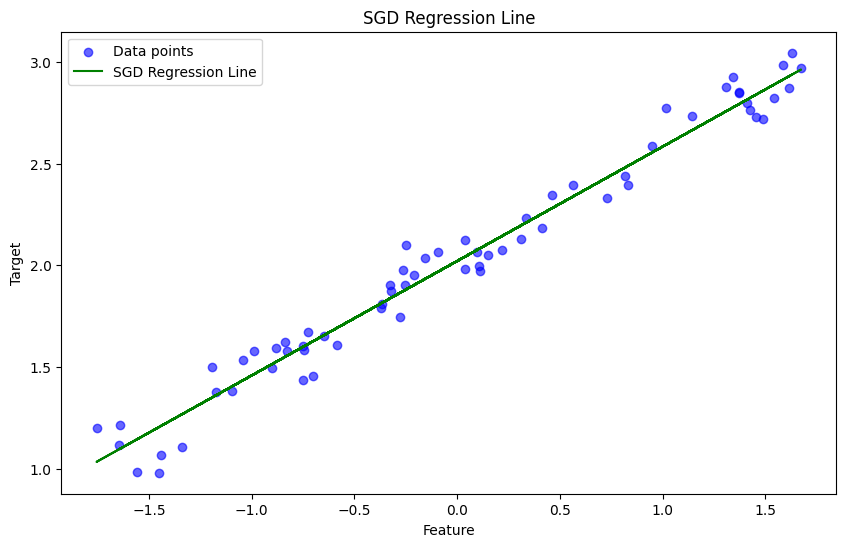

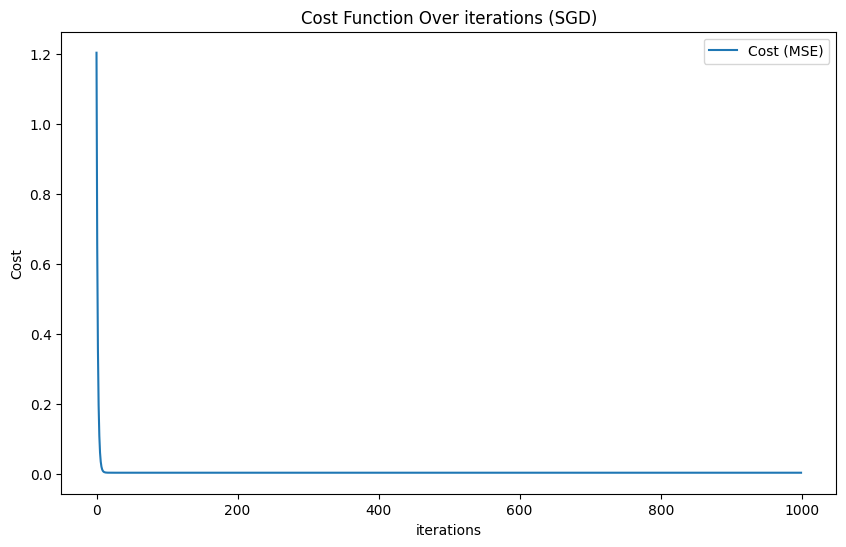

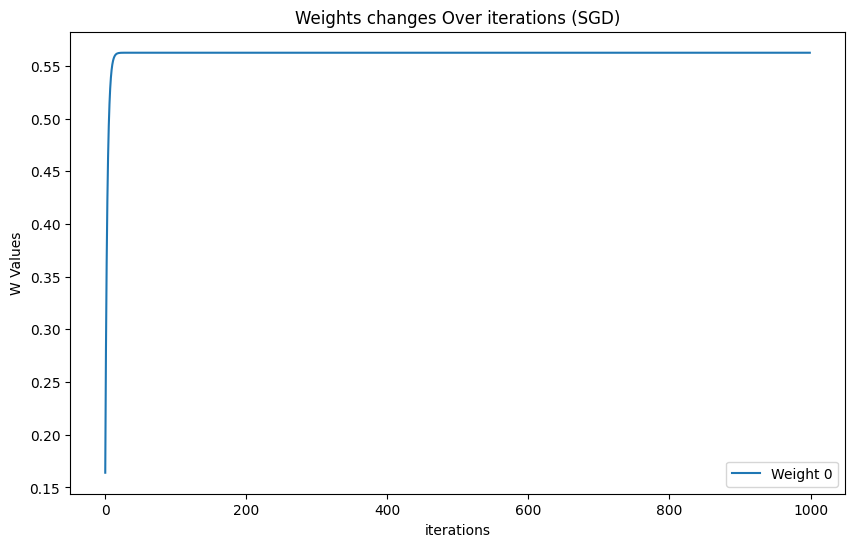

SGD Final MSE: 0.0127

Changes in Weights:
Weight 0: [0.16395901 0.28057321 0.36340818 0.42216771 0.46378714 0.49321862
 0.51399471 0.52863266 0.53892422 0.54614314] ... [0.56246884 0.56246884 0.56246884 0.56246884 0.56246884 0.56246884
 0.56246884 0.56246884 0.56246884 0.56246884]


In [49]:
from sklearn.linear_model import SGDRegressor


sgd_regressor = SGDRegressor(max_iter=1, tol=None, eta0=0.01, warm_start=True, random_state=42)

cost_history = []
bias_history = []
weights_history = []

for i in range(1000):
    sgd_regressor.fit(X_train_scaled, y_train.ravel())
    weights_history.append(sgd_regressor.coef_.copy())
    bias_history.append(sgd_regressor.intercept_[0])
    y_pred = sgd_regressor.predict(X_train_scaled)
    cost = mean_squared_error(y_train, y_pred) / 2
    cost_history.append(cost)
    if i % 200 == 0:
        print(f"Iteration {i}: Weights = {sgd_regressor.coef_}, Bias = {sgd_regressor.intercept_}, Cost = {cost:.4f}")


plt.figure(figsize=(10, 6))
plt.scatter(X_train_scaled, y_train, color='blue', alpha=0.6, label="Data points")
plt.plot(X_train_scaled, sgd_regressor.predict(X_train_scaled), color='green', label='SGD Regression Line')
plt.title("SGD Regression Line")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(len(cost_history)), cost_history, label="Cost (MSE)")
plt.title("Cost Function Over iterations (SGD)")
plt.xlabel("iterations")
plt.ylabel("Cost")
plt.legend()
plt.show()

weights_history = np.array(weights_history)
plt.figure(figsize=(10, 6))
for i in range(weights_history.shape[1]):
    plt.plot(range(len(weights_history)), weights_history[:, i], label=f"Weight {i}")
plt.title("Weights changes Over iterations (SGD)")
plt.xlabel("iterations")
plt.ylabel("W Values")
plt.legend()
plt.show()


y_pred_sgd = sgd_regressor.predict(X_test_scaled)
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
print(f"SGD Final MSE: {mse_sgd:.4f}")

print("\nChanges in Weights:")
for i, weight in enumerate(weights_history.T):
    print(f"Weight {i}: {weight[:10]} ... {weight[-10:]}")
